# Preprocessing

```
Better Data > Fancier Algorithms
```

Data cleaning involves fixing structural errors.

### Statistical
- Hypothesis Testing
- samples Resampling Methods


### Data cleansing
- Metadata
- Processing data types
- Processing Dates And Times
- Inconsistent data
- Duplicate records
- Missing values

### Feature engineering 
- Feature extraction from text and images
- Metrics optimization
- Hyperparameter 
- Better Generalization
  - Lesson 12: Fix Overfitting With Regularization
  - Lesson 13: Penalize Large Weights With Weight Regularization
  - Lesson 14: Penalize Large Activity With Activity Regularization
- Data leakages

### Imports

In [374]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd


# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Preprocessing
from sklearn.preprocessing import LabelEncoder

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import statsmodels as sm

# Dataset
from sklearn.datasets import load_iris

# Other
from IPython.display import Image
import configparser
import subprocess
import warnings
import pprint
import time
import os

---

## Prepare Principal Directory

In [375]:
def prepare_directory_work(end_directory: str='notebooks'):
    # Current path
    curr_dir = os.path.dirname (os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return curr_dir
    
    return f'Current working directory: {curr_dir}'

In [376]:
prepare_directory_work(end_directory='notebooks')

'Current working directory: /home/campos/projetos/artificial_inteligence/data-science/flow_analysis'

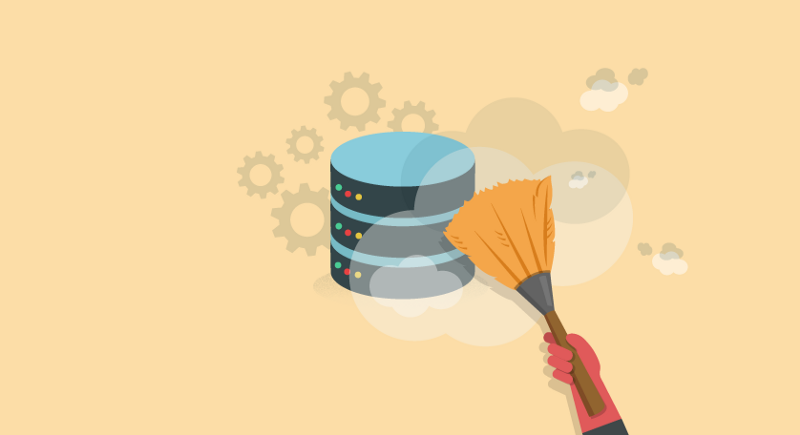

In [377]:
# hide_code
Image('references/images/data-cleaning.png',width='100%', height='100%')

---

## Cell Format

In [378]:
# hide_code
import configparser

config = configparser.ConfigParser()
config.read('src/visualization/plot_config.ini')

figure_titlesize = config['figure']['figure_titlesize']
figure_figsize_large = int(config['figure']['figure_figsize_large'])
figure_figsize_width = int(config['figure']['figure_figsize_width'])
figure_dpi = int(config['figure']['figure_dpi'])
figure_facecolor = config['figure']['figure_facecolor']
figure_autolayout = bool(config['figure']['figure_autolayout'])
savefig_format = config['figure']['savefig_format']
savefig_dpi = int(config['figure']['savefig_dpi'])

axes_labelsize = int(config['axes']['axes_labelsize'])
axes_titlesize = int(config['axes']['axes_labelsize'])

lines_antialiased = bool(config['line']['lines_antialiased'])
lines_linewidth = int(config['line']['lines_linewidth'])
lines_color = config['line']['lines_color']

hist_bins = int(config['histogram']['hist_bins'])

boxplot_vertical = bool(config['boxplot']['boxplot_vertical'])
boxplot_showmeans = bool(config['boxplot']['boxplot_showmeans'])
boxplot_showbox = bool(config['boxplot']['boxplot_showbox'])
boxplot_flierprops_color = config['boxplot']['boxplot_flierprops_color']
boxplot_flierprops_markerfacecolor = config['boxplot']['boxplot_flierprops_markerfacecolor']
boxplot_flierprops_markersize = int(config['boxplot']['boxplot_flierprops_markersize'])
boxplot_meanprops_linewidth = int(config['boxplot']['boxplot_meanprops_linewidth'])

font_family = config['font']['font_family']
font_size = int(config['font']['font_size'])

legend_loc = config['legend']['legend_loc']
legend_fontsize = int(config['legend']['legend_fontsize'])

In [379]:
# hide_code
# matplotlib rcParams
# ===================
import matplotlib.pyplot as plt


plt.style.use('seaborn')  # fivethirtyeight

# Figure
plt.rcParams['figure.titlesize'] = figure_titlesize
plt.rcParams['figure.figsize'] = [figure_figsize_large, figure_figsize_width] 
plt.rcParams['figure.dpi'] = figure_dpi
plt.rcParams['figure.facecolor'] = figure_facecolor
plt.rcParams['figure.autolayout'] = figure_autolayout

plt.rcParams['savefig.format'] = savefig_format
plt.rcParams['savefig.dpi'] = savefig_dpi

# Axes
plt.rcParams['axes.labelsize'] = axes_labelsize
plt.rcParams['axes.titlesize'] = axes_titlesize

# Lines
plt.rcParams['lines.antialiased'] = lines_antialiased
plt.rcParams['lines.linewidth'] = lines_linewidth
plt.rcParams['lines.color'] = lines_color
 
# Histogram Plots
plt.rcParams['hist.bins'] = hist_bins

# Boxplot
plt.rcParams['boxplot.vertical'] = boxplot_vertical
plt.rcParams['boxplot.showmeans'] = boxplot_showmeans
plt.rcParams['boxplot.showbox'] = boxplot_showbox
plt.rcParams['boxplot.flierprops.color'] = boxplot_flierprops_color
plt.rcParams['boxplot.flierprops.markerfacecolor'] = boxplot_flierprops_markerfacecolor
plt.rcParams['boxplot.flierprops.markersize'] = boxplot_flierprops_markersize
plt.rcParams['boxplot.meanprops.linewidth'] = boxplot_meanprops_linewidth

# Font
plt.rcParams['font.family'] = font_family
plt.rcParams['font.size'] = font_size

# Legend
plt.rcParams['legend.loc'] = legend_loc
plt.rcParams['legend.fontsize'] = legend_fontsize


In [380]:
# hide_code
# Seaborn rcParams
# ===================

rc={'savefig.dpi': 500, 
    'figure.autolayout': True, 
    'figure.figsize': [15, 8], 
    'axes.labelsize': 18,
    'axes.titlesize': 18, 
    'font.size': 15, 
    'lines.linewidth': 1.0, 
    'lines.markersize': 8, 
    'legend.fontsize': 15,
    'xtick.labelsize': 15, 
    'ytick.labelsize': 15}

sns.set(font=font_family,
        context='poster',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True)

# graph style
sns.set(style='dark', palette='deep')

In [1]:
# hide_code
# Guarantees visualization inside the jupyter
%matplotlib inline

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload


# Print xxxx rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# Pretty print
pp = pprint.PrettyPrinter(indent=4)

NameError: name 'pd' is not defined

---

## Load Data

In [401]:
%%time

deals = pd.read_csv('data/raw/deals.tsv',
                    sep='\t',
                    encoding='utf-8')
companies = pd.read_csv('data/raw/companies.tsv',
                        sep='\t',
                        encoding='utf-8')
contacts = pd.read_csv('data/raw/contacts.tsv',
                       sep='\t',
                       encoding='utf-8')

CPU times: user 8.44 ms, sys: 14 µs, total: 8.45 ms
Wall time: 7.85 ms


In [402]:
%%time

df_callcenter = pd.read_csv('data/raw/callcenter_marketing.csv', 
                            encoding='utf8',
                            delimiter=',',
                            verbose=True)

Tokenization took: 33.77 ms
Type conversion took: 43.09 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 6.81 ms
Type conversion took: 9.15 ms
Parser memory cleanup took: 0.01 ms
CPU times: user 105 ms, sys: 3.79 ms, total: 109 ms
Wall time: 107 ms


In [403]:
df = pd.DataFrame({'month': [1, 4, 7, 10],
                    'year': [2012, 2014, 2013, 2014],
                    'sale': [55, 40, 84, 31]})

---

## Name Adaption of Features

- `strip()` in features names
- Name dont must capitalize
- lower case
- without spaces

In [441]:
display(contacts.columns)

Index([' contactsId', 'contactsName   ', 'contactsDateCreated',
       'CONTACTSCreatedBy', 'contactsEmails', 'contactsPhones',
       'contactsEmployers', 'employersId', 'contactsHomeAdress',
       'contactsLatLong', 'contactsRelatedToLead', 'contactsResponsible'],
      dtype='object')

In [442]:
# Renamed columns
contacts.columns = [' contactsId',
                    'contactsName   ',
                    'contactsDateCreated',
                    'CONTACTSCreatedBy',
                    'contactsEmails', 
                    'contactsPhones',
                    'contactsEmployers',
                    'employersId', 
                    'contactsHomeAdress',
                    'contactsLatLong',
                    'contactsRelatedToLead',
                    'contactsResponsible']

display(contacts.columns)

Index([' contactsId', 'contactsName   ', 'contactsDateCreated',
       'CONTACTSCreatedBy', 'contactsEmails', 'contactsPhones',
       'contactsEmployers', 'employersId', 'contactsHomeAdress',
       'contactsLatLong', 'contactsRelatedToLead', 'contactsResponsible'],
      dtype='object')

In [450]:
# strip()
# lower()

formated_columns = []

for column in contacts.columns:
    print(column)
    new_column = column.strip().lower()
    print(new_column)
    
    formated_columns.append(new_column)
    
print(formated_columns)

 contactsId
contactsid
contactsName   
contactsname
contactsDateCreated
contactsdatecreated
CONTACTSCreatedBy
contactscreatedby
contactsEmails
contactsemails
contactsPhones
contactsphones
contactsEmployers
contactsemployers
employersId
employersid
contactsHomeAdress
contactshomeadress
contactsLatLong
contactslatlong
contactsRelatedToLead
contactsrelatedtolead
contactsResponsible
contactsresponsible
['contactsid', 'contactsname', 'contactsdatecreated', 'contactscreatedby', 'contactsemails', 'contactsphones', 'contactsemployers', 'employersid', 'contactshomeadress', 'contactslatlong', 'contactsrelatedtolead', 'contactsresponsible']


## Set Index

In [451]:
display(df)

,month,year,sale
0,1,2012,55
1,4,2014,40
2,7,2013,84
3,10,2014,31


#### Unique index

In [452]:
df.set_index('month')

,year,sale
month,,
1,2012,55
4,2014,40
7,2013,84
10,2014,31


#### Multiple index

In [453]:
df.set_index(['year', 'month'])

,,sale
year,month,
2012,1,55
2014,4,40
2013,7,84
2014,10,31


In [454]:
df.set_index([pd.Index([1, 2, 3, 4]), 'year'])

,,month,sale
,year,,
1,2012,1,55
2,2014,4,40
3,2013,7,84
4,2014,10,31


---

# Irrelevant Data
- The first step to data cleaning is removing unwanted observations from your dataset.
- SQL: `select distict`

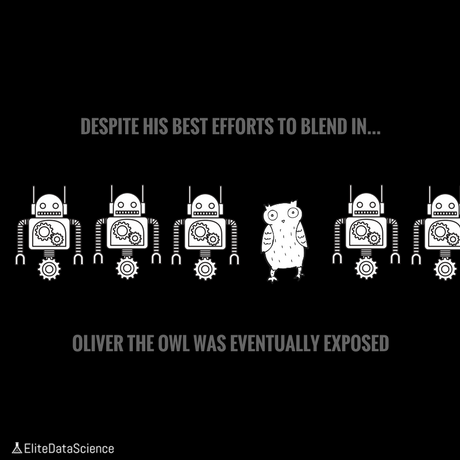

In [455]:
# hide_code
Image('references/images/irrelevant_data.png', width=500, height=100)

Irrelevant observations are those that **don’t actually fit the specific problem** that you’re trying to solve.

In [456]:
# unique()

def show_categorical_values(df: 'DataFrame', *columns: list) -> None:
    for column in columns:
        list_unique = df[column].unique()
        print(f"The categorical column {column} contains this values:\n\n{list_unique}\n")

In [457]:
show_categorical_values(df_callcenter, *list_categorical_col)

The categorical column profissao contains this values:

['dona_casa' 'servicos' 'admin.' 'colarinho_azul' 'tecnico' 'aposentado'
 'gerente' 'desempregado' 'informal' nan 'empreendedor' 'estudante']

The categorical column estado_civil contains this values:

['casado' 'solteiro' 'divorciado' nan]

The categorical column educacao contains this values:

['fundamental_4a' 'ensino_medio' 'fundamental_6a' 'fundamental_9a'
 'curso_tecnico' nan 'graduacao_completa' 'analfabeto']

The categorical column inadimplente contains this values:

['nao' nan 'sim']

The categorical column emprestimo_moradia contains this values:

['nao' 'sim' nan]

The categorical column emprestimo_pessoal contains this values:

['nao' 'sim' nan]

The categorical column meio_contato contains this values:

['telefone' 'celular']

The categorical column mes contains this values:

['mai' 'jun' 'jul' 'ago' 'out' 'nov' 'dez' 'mar' 'abr' 'set']

The categorical column dia_da_semana contains this values:

['seg' 'ter' 'qua' 'q

---

## Split Features: _Catogorical_ and _Numerical_
É dividir o dataset em features numéricas e categóricas. Para isso é necessário usar list de columns.
- `describe()`

#### Global Environment

In [460]:
# Lists that will be manipulated in the data processing
list_columns = []
list_categorical_col = []
list_numerical_col = []

In [461]:
def get_col(df: 'dataframe', type_descr: 'numpy') -> list:
    """
    Function get list columns 
    
    Args:
    type_descr
        np.number, np.object -> return list with all columns
        np.number            -> return list numerical columns 
        np.object            -> return list object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n')    
    else:
        return col.tolist() 

In [462]:
list_numerical_col = get_col(df=df_callcenter,
                             type_descr=np.number)
list_categorical_col = get_col(df=df_callcenter,
                               type_descr=np.object)
list_columns = get_col(df=df_callcenter,
                       type_descr=[np.object, np.number])

In [463]:
display(list_numerical_col)
display(list_categorical_col)

['Unnamed: 0',
 'idade',
 'duracao',
 'qtd_contatos_campanha',
 'dias_ultimo_contato',
 'qtd_contatos_total',
 'indice_precos_consumidor',
 'indice_confianca_consumidor',
 'euribor3m',
 'numero_empregados']

['profissao',
 'estado_civil',
 'educacao',
 'inadimplente',
 'emprestimo_moradia',
 'emprestimo_pessoal',
 'meio_contato',
 'mes',
 'dia_da_semana',
 'campanha_anterior',
 'resultado']

In [464]:
df_callcenter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
Unnamed: 0                     41188 non-null int64
idade                          41188 non-null int64
profissao                      40858 non-null object
estado_civil                   41108 non-null object
educacao                       39457 non-null object
inadimplente                   32591 non-null object
emprestimo_moradia             40198 non-null object
emprestimo_pessoal             40198 non-null object
meio_contato                   41188 non-null object
mes                            41188 non-null object
dia_da_semana                  41188 non-null object
duracao                        41188 non-null int64
qtd_contatos_campanha          41188 non-null int64
dias_ultimo_contato            41188 non-null int64
qtd_contatos_total             41188 non-null int64
campanha_anterior              41188 non-null object
indice_precos_consumidor       41188 non-null flo

---

## Categorical ---> Numerical

Algoritmos de aprendizagem estatística, trabalham apenas com valores numéricos, então, se deixar valores de rótulo como strings, a librarie scikit-learn, por exemplo, faria a conversão internamente (mais especificamente, os rótulos de string serão convertidos em float desconhecidos).

- Multiple Labels
   - `map()`
   - `LabelEncoder()`

- [Binarizer Labels (feature engineering)](5-feature_engineering)

### Algoritms
- Ótimo para modelos de tree
- Confuso para linear models

#### Example: pclass

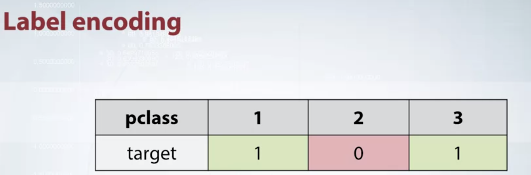

In [516]:
# hide_code
Image('references/images/confusion.png')

podemos colocar previsões de modelos lineares, e veja todos eles são em torno de 0,5. Isso parece meio que setado.

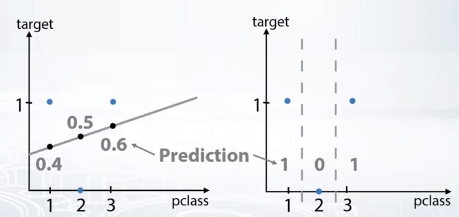

In [517]:
# hide_code
Image('references/images/predictions.png')

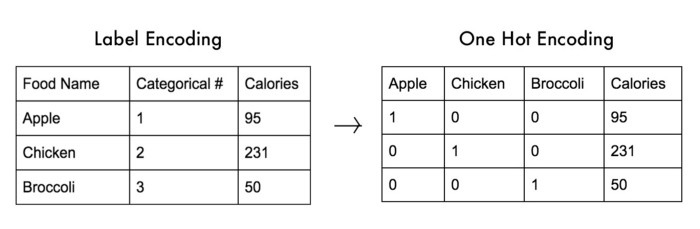

In [459]:
# hide_code
Image('references/images/one_hot_x_label.jpeg')



**References**
- https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
- https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

### `map()`

- Gerar um dict() com o mapeamento de `df[column].unique()` para numeric values:
```
generate_number_by_col()
```
- Mapear valores internos das colunas: 
```
map_values()
```



In [465]:
# I used the dictionary because they are more efficient in these cases
# https://stackoverflow.com/questions/22084338/pandas-dataframe-performance

def generate_dict_by_col(df: 'dataframe', *columns: list) -> dict:
    """
    :return:
        Return a dict with label of each column 
    """
    dict_unique = {}
    
    for column in columns:
        list_unique = df[column].unique().tolist()
        dict_column = {}
    
        for element in list_unique:
            if isinstance(element, float) is True:  # type nan is float
                continue
            dict_column[element] = int(list_unique.index(element))
        # add dict column in principal dict 
        dict_unique[column] = dict_column          
    
    print("-"*25, "Dictionary with Values Map by Column", "-"*25, end='\n\n')
    return dict_unique

In [466]:
dict_cat_unique = generate_number_by_col(df_callcenter, 
                                         *list_categorical_col)

pp.pprint(dict_cat_unique)

------------------------- Dictionary with Values Map by Column -------------------------

{   'campanha_anterior': {'fracasso': 1, 'nao_existente': 0, 'sucesso': 2},
    'dia_da_semana': {'qua': 2, 'qui': 3, 'seg': 0, 'sex': 4, 'ter': 1},
    'educacao': {   'analfabeto': 7,
                    'curso_tecnico': 4,
                    'ensino_medio': 1,
                    'fundamental_4a': 0,
                    'fundamental_6a': 2,
                    'fundamental_9a': 3,
                    'graduacao_completa': 6},
    'emprestimo_moradia': {'nao': 0, 'sim': 1},
    'emprestimo_pessoal': {'nao': 0, 'sim': 1},
    'estado_civil': {'casado': 0, 'divorciado': 2, 'solteiro': 1},
    'inadimplente': {'nao': 0, 'sim': 2},
    'meio_contato': {'celular': 1, 'telefone': 0},
    'mes': {   'abr': 8,
               'ago': 3,
               'dez': 6,
               'jul': 2,
               'jun': 1,
               'mai': 0,
               'mar': 7,
               'nov': 5,
               'out'

In [467]:
df_callcenter.tail()

,Unnamed: 0,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
41183,41183,73,aposentado,casado,curso_tecnico,nao,sim,nao,celular,nov,sex,334,1,999,0,nao_existente,94.767,-50.8,1.028,4963.6,sim
41184,41184,46,colarinho_azul,casado,curso_tecnico,nao,nao,nao,celular,nov,sex,383,1,999,0,nao_existente,94.767,-50.8,1.028,4963.6,nao
41185,41185,56,aposentado,casado,graduacao_completa,nao,sim,nao,celular,nov,sex,189,2,999,0,nao_existente,94.767,-50.8,1.028,4963.6,nao
41186,41186,44,tecnico,casado,curso_tecnico,nao,nao,nao,celular,nov,sex,442,1,999,0,nao_existente,94.767,-50.8,1.028,4963.6,sim
41187,41187,74,aposentado,casado,curso_tecnico,nao,sim,nao,celular,nov,sex,239,3,999,1,fracasso,94.767,-50.8,1.028,4963.6,nao


In [468]:
# map

def map_values(df: 'dataframe', column: str, dict_label: dict) -> None:
    df[column] = df[column].map(dict_label)
    
    return print(f'Type column {column}: {df[column].dtypes}')

In [469]:
map_values(df_callcenter, 'profissao', dict_cat_unique['profissao'])
map_values(df_callcenter, 'estado_civil', dict_cat_unique['estado_civil'])
map_values(df_callcenter, 'educacao', dict_cat_unique['educacao'])

map_values(df_callcenter, 'inadimplente', dict_cat_unique['inadimplente'])
map_values(df_callcenter, 'emprestimo_moradia', dict_cat_unique['emprestimo_moradia'])
map_values(df_callcenter, 'emprestimo_pessoal', dict_cat_unique['emprestimo_pessoal'])

map_values(df_callcenter, 'meio_contato', dict_cat_unique['meio_contato'])
map_values(df_callcenter, 'campanha_anterior', dict_cat_unique['campanha_anterior'])

map_values(df_callcenter, 'resultado', dict_cat_unique['resultado'])

Type column profissao: float64
Type column estado_civil: float64
Type column educacao: float64
Type column inadimplente: float64
Type column emprestimo_moradia: float64
Type column emprestimo_pessoal: float64
Type column meio_contato: int64
Type column campanha_anterior: int64
Type column resultado: int64


In [470]:
df_callcenter.tail()

,Unnamed: 0,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
41183,41183,73,5.0,0.0,4.0,0.0,1.0,0.0,1,nov,sex,334,1,999,0,0,94.767,-50.8,1.028,4963.6,1
41184,41184,46,3.0,0.0,4.0,0.0,0.0,0.0,1,nov,sex,383,1,999,0,0,94.767,-50.8,1.028,4963.6,0
41185,41185,56,5.0,0.0,6.0,0.0,1.0,0.0,1,nov,sex,189,2,999,0,0,94.767,-50.8,1.028,4963.6,0
41186,41186,44,4.0,0.0,4.0,0.0,0.0,0.0,1,nov,sex,442,1,999,0,0,94.767,-50.8,1.028,4963.6,1
41187,41187,74,5.0,0.0,4.0,0.0,1.0,0.0,1,nov,sex,239,3,999,1,1,94.767,-50.8,1.028,4963.6,0


In [471]:
%%time

df_callcenter = pd.read_csv('data/raw/callcenter_marketing.csv', 
                            encoding='utf8',
                            delimiter=',')

CPU times: user 125 ms, sys: 0 ns, total: 125 ms
Wall time: 124 ms


In [472]:
df_callcenter.head()

,Unnamed: 0,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
0,0,56,dona_casa,casado,fundamental_4a,nao,nao,nao,telefone,mai,seg,261,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
1,1,57,servicos,casado,ensino_medio,NaN,nao,nao,telefone,mai,seg,149,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
2,2,37,servicos,casado,ensino_medio,nao,sim,nao,telefone,mai,seg,226,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
3,3,40,admin.,casado,fundamental_6a,nao,nao,nao,telefone,mai,seg,151,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
4,4,56,servicos,casado,ensino_medio,nao,nao,sim,telefone,mai,seg,307,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao


### `LabelEncoder()`
- Create a label encoder object
- Fit encoder to column
- Transform Categories Into Integers

**NOTE:** Problems with missing values.

In [512]:
from sklearn import preprocessing


df_callcenter.head(5)['mes']

0    5
1    5
2    5
3    5
4    5
Name: mes, dtype: int64

In [513]:
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()

# Fit the encoder to the pandas column
le.fit(df_callcenter['mes'])

list(le.classes_)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [515]:
df_callcenter['mes'] = le.transform(df_callcenter['mes']) 

df_callcenter.head(5)['mes']

0    5
1    5
2    5
3    5
4    5
Name: mes, dtype: int64

# Dataframe or Dict?

- https://stackoverflow.com/questions/22084338/pandas-dataframe-performance

In [481]:
import timeit

setup = '''
import numpy, pandas
df = pandas.DataFrame(numpy.zeros(shape=[10, 10]))
dictionary = df.to_dict()
'''

f = ['value = dictionary[5][5]', 'value = df.loc[5, 5]', 'value = df.iloc[5, 5]']

for func in f:
    print(func)
    print(min(timeit.Timer(func, setup).repeat(3, 100000)))

value = dictionary[5][5]
0.003957723034545779
value = df.loc[5, 5]
0.6038553700200282
value = df.iloc[5, 5]
0.7725505809648894


In [482]:
import timeit

setup = '''
import numpy, pandas
df = pandas.DataFrame(numpy.zeros(shape=[10, 1000]))
dictionary = df.to_dict()
'''

# f = ['value = dictionary[5][5]', 'value = df.loc[5, 5]', 'value = df.iloc[5, 5]']
f = ['value = [val[5] for col,val in dictionary.items()]', 'value = df.loc[5]', 'value = df.iloc[5]']

for func in f:
    print(func)
    print(min(timeit.Timer(func, setup).repeat(3, 100000)))

value = [val[5] for col,val in dictionary.items()]
5.634586529980879
value = df.loc[5]
9.166302037017886
value = df.iloc[5]
7.521221702976618


---

# Duplicate Records

Can receive when:
- Combine datasets from multiple places
- Scrape data
- Receive data from clients/other departments


- Note
Sempre analisar se os valores repetidos não são super coincidencias.

PESQUISAR

- algoritmos que trabalham com valores repetidos

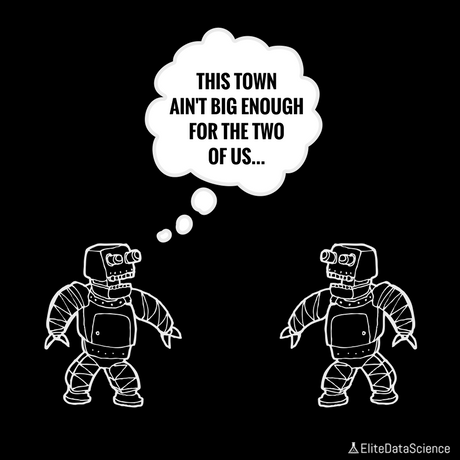

In [502]:
# hide_code
Image('references/images/duplicate_data.png')

In [1]:
# duplicated()

def check_quat_duplicated_data(df: 'DataFrame') -> None:
    """
    Check if contains duplicated data
    Mark duplicates as ``True`` if enough row equal
    Except for the first occurrence.    
    """
    duplicated = df.duplicated().sum()
    total_lines = df.shape[0]
    percentage = (duplicated/total_lines) * 100
    
    print("-"*25, "DUPLICATED DATA", "-"*25,)
    print("\nSHAPE of data: {}".format(df.shape[0]))
    print("TOTAL duplicated data: {}".format(duplicated))
    print("PERCENTAGE duplicated data: {} %".format(percentage)) 

In [485]:
check_quat_duplicated_data(df_callcenter)

------------------------- DUPLICATED DATA -------------------------

SHAPE of data: 41188
TOTAL duplicated data: 0
PERCENTAGE duplicated data: 0.0 %


#### % duplicated values

In [486]:
# % duplicated values

duplicated = dataframe.duplicated().sum()
total_cells = np.product(dataframe.shape)

print("In dataset dataframe has {}% of duplicated values.".format((duplicated/total_cells) * 100))

NameError: name 'dataframe' is not defined

#### Create dataframe only duplicated values

In [ ]:
# Create dataframe only duplicated values

df_duplicated_value = dataframe[dataframe.duplicated(keep=False)]
df_duplicated_value

#### Create tag duplicated values

In [ ]:
### OPTIONAL ###

def calcule_duplicated_values(df_in):
    """
    Return dataframe with columns contains duplicated values
    """
    # Total
    duplicated = dataframe.duplicated().sum()
    print('Total of duplicated values: {}' .format(duplicated))

    # Create column 
    df_duplicated = df_in[df_in.duplicated(keep=False)]
    df_in['duplicated_values'] = None    # first create empty column 
    
    # Insert new column in df
    df_in['duplicated_values'] = df_duplicated
    
    # Replace None by 0
    df_in['duplicated_values'] = df_in['duplicated_values'].replace(np.nan, 0, regex=True)    

calcule_duplicated_values(dataframe)

In [ ]:
dataframe.head(20)

In [ ]:
# Remove duplicated
dataframe = dataframe.drop_duplicates(keep='first')
print("Size dataframe = ", dataframe.shape)

---

## Missing values

**You cannot simply ignore missing values in your dataset.** You must handle them in some way.


**ASK:** "Um dado faltante é porque não foi gravado ou porque não existe?"<br/>
Para responder essa questão é necessário analisar os campos sem dados.

**NOTE**: It's necessary install<br/>
`pip install missingno`

#### Check values missing

In [35]:
# return TRUE if collumn contains values missing

missing = dataframe.isnull().any()
print(missing)

account_key          False
status               False
join_date            False
cancel_date           True
days_to_cancel        True
is_udacity           False
is_canceled          False
duplicated_values    False
dtype: bool


#### Check Quantitive Each Columns

In [40]:
dataframe.isnull().sum()

account_key            0
status                 0
join_date              0
cancel_date          652
days_to_cancel       652
is_udacity             0
is_canceled            0
duplicated_values      0
missing_values         0
dtype: int64

#### Check Total Row

In [41]:
dataframe.isnull().sum().sum() 

1304

In [75]:
# isnull()

def check_columns_missing_val(df: 'DataFrame'):
    """
    Return TRUE, if collumn contains values missing
    """
    list_columns_missing = []
    
    for index, value in enumerate(df.isnull().any()):
        if value is True:
            list_columns_missing.append(df.columns[index])
    
    if len(list_columns_missing) > 0:
        print("Columns's name with missing values:")
        return list_columns_missing   
    
    return "The dataframe NOT contains missing values."

In [76]:
list_columns_m_v = check_columns_missing_val(df_callcenter)

display(list_columns_m_v)  # display show one column by line

Columns's name with missing values:


['profissao',
 'estado_civil',
 'educacao',
 'inadimplente',
 'emprestimo_moradia',
 'emprestimo_pessoal',
 'mes',
 'dia_da_semana']

In [71]:
# df.isnull().sum().sum()

def check_quat_missing_data(df: 'DataFrame', columns_m_v: list) -> None:
    """
    Check if contains missing data
    Mark missing, if line contains NaN in any column
    """    
    missing_values_count = df.isnull().sum()
    total_missing = missing_values_count.sum()
    total_lines = df.shape[0]
    total_cells = np.product(df.shape)
        
    percentage_by_line = (total_missing/total_lines) * 100
    percentage_by_cell = (total_missing/total_cells) * 100
    
    # by column
    quant_missing_by_column = df[columns_m_v].isnull().sum()
    percentage_missing_by_column = (quant_missing_by_column/total_lines) * 100
    
    print("-"*25, "MISSING VALUES", "-"*25)
    print("\nSHAPE of data: {}".format(df.shape[0]))
    print("TOTAL missing values: {}".format(total_missing))
    print("TOTAL missing values by column:\n{}\n".format(quant_missing_by_column))
    
    print("PERCENTAGE missing values by cell: {:2.3} %".format(percentage_by_cell))
    print("PERCENTAGE missing values by row: {:2.3} %".format(percentage_by_line))
    print("PERCENTAGE missing values by column:\n{}".format(percentage_missing_by_column)) 

In [72]:
check_quat_missing_data(df_callcenter, list_columns_m_v)

------------------------- MISSING VALUES -------------------------

SHAPE of data: 41188
TOTAL missing values: 95094
TOTAL missing values by column:
profissao               330
estado_civil             80
educacao               1731
inadimplente           8597
emprestimo_moradia      990
emprestimo_pessoal      990
mes                   41188
dia_da_semana         41188
dtype: int64

PERCENTAGE missing values by cell: 11.0 %
PERCENTAGE missing values by row: 2.31e+02 %
PERCENTAGE missing values by column:
profissao              1
estado_civil           0
educacao               4
inadimplente          21
emprestimo_moradia     2
emprestimo_pessoal     2
mes                  100
dia_da_semana        100
dtype: float64


#### Create dataframe only missing values columns

In [356]:
# Create column 
df_null = dataframe[dataframe.isnull().any(axis=1)]

display(df_null.head(10))

NameError: name 'dataframe' is not defined

#### Create Tag Missing Values

In [74]:
def calcule_missing_values(df_in):
    """
    Return dataframe with columns contains missing values
    """
    # Total
    total_missing_values = df_in.isnull().sum().sum()
    print('Total of missing values: {}' .format(total_missing_values))
    
    # Columns
    missing_value_columns = df_in.columns[dataframe.isnull().any()].tolist()
    print('Columns with missing values: {}' .format(missing_value_columns))

    # Create column 
    df_null = df_in[df_in.isnull().any(axis=1)]
    df_in['missing_values'] = None    # first create empty column 
    
    # Insert new column in df
    df_in['missing_values'] = df_null
    
    # Replace None by 0
    df_in['missing_values'] = df_in['missing_values'].replace(np.nan, 0, regex=True)
    
    # Convert values in integer
    df_in['missing_values'] = df_in['missing_values'].astype(str)
    

calcule_missing_values(dataframe)

Total of missing values: 1304
Columns with missing values: ['cancel_date', 'days_to_cancel']


In [77]:
dataframe.head(10)

,account_key,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled,missing_values
0,448,canceled,2014-11-10,2015-01-14,65,True,True,0.0
1,448,canceled,2014-11-05,2014-11-10,5,True,True,0.0
2,448,canceled,2015-01-27,2015-01-27,0,True,True,0.0
3,448,canceled,2014-11-10,2014-11-10,0,True,True,0.0
4,448,current,2015-03-10,NaN,nan,True,False,448.0
5,448,canceled,2015-01-14,2015-01-27,13,True,True,0.0
6,448,canceled,2015-01-27,2015-03-10,42,True,True,0.0
7,448,canceled,2015-01-27,2015-01-27,0,True,True,0.0
8,448,canceled,2015-01-27,2015-01-27,0,True,True,0.0
9,700,canceled,2014-11-10,2014-11-16,6,False,True,0.0


#### Plot missing by columns

findfont: Font family ['plt.cm.cool'] not found. Falling back to DejaVu Sans.


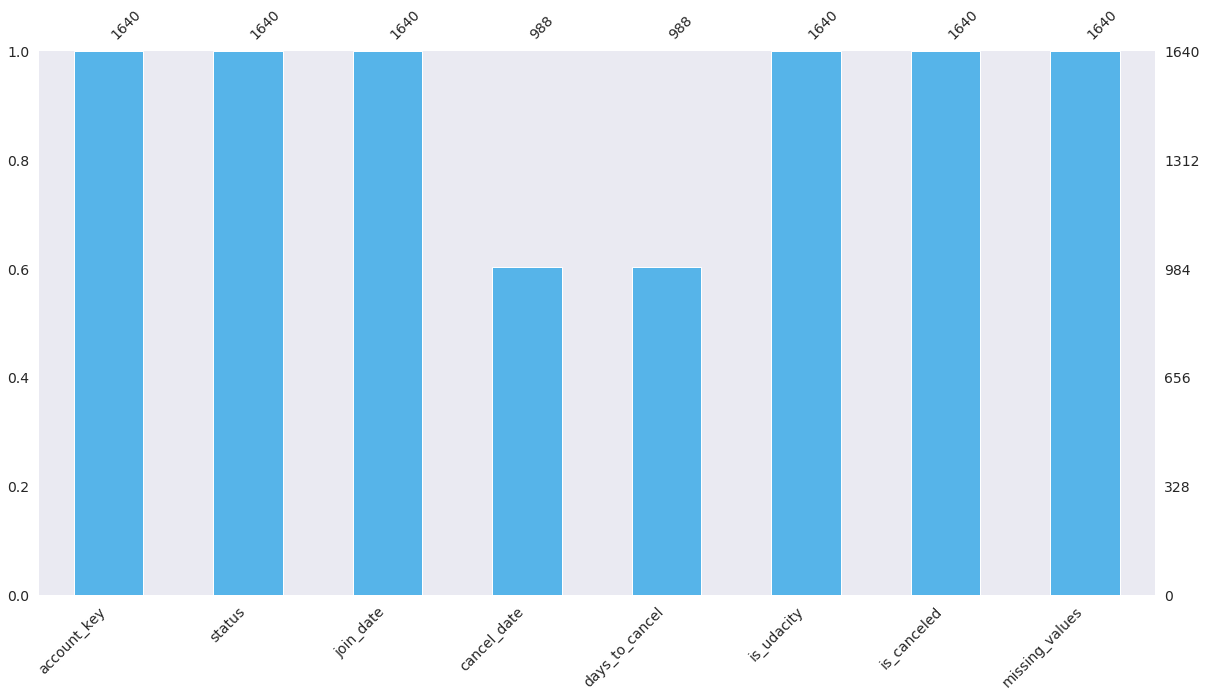

In [82]:
# Show missing by columns

msno.bar(dataframe,figsize=(20,10),
          color=default_color,
          fontsize=14,
          labels=True)

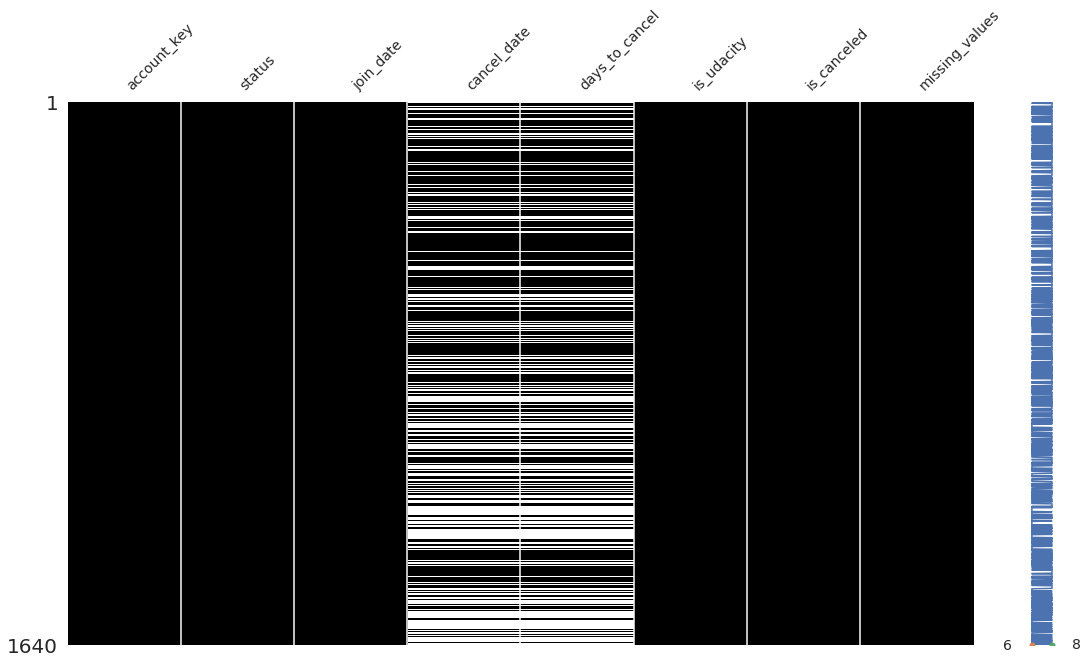

In [96]:
unsorted_data = msno.nullity_sort(dataframe)
msno.matrix(unsorted_data, 
            color=None,
            figsize=(18,10),
            fontsize=14)

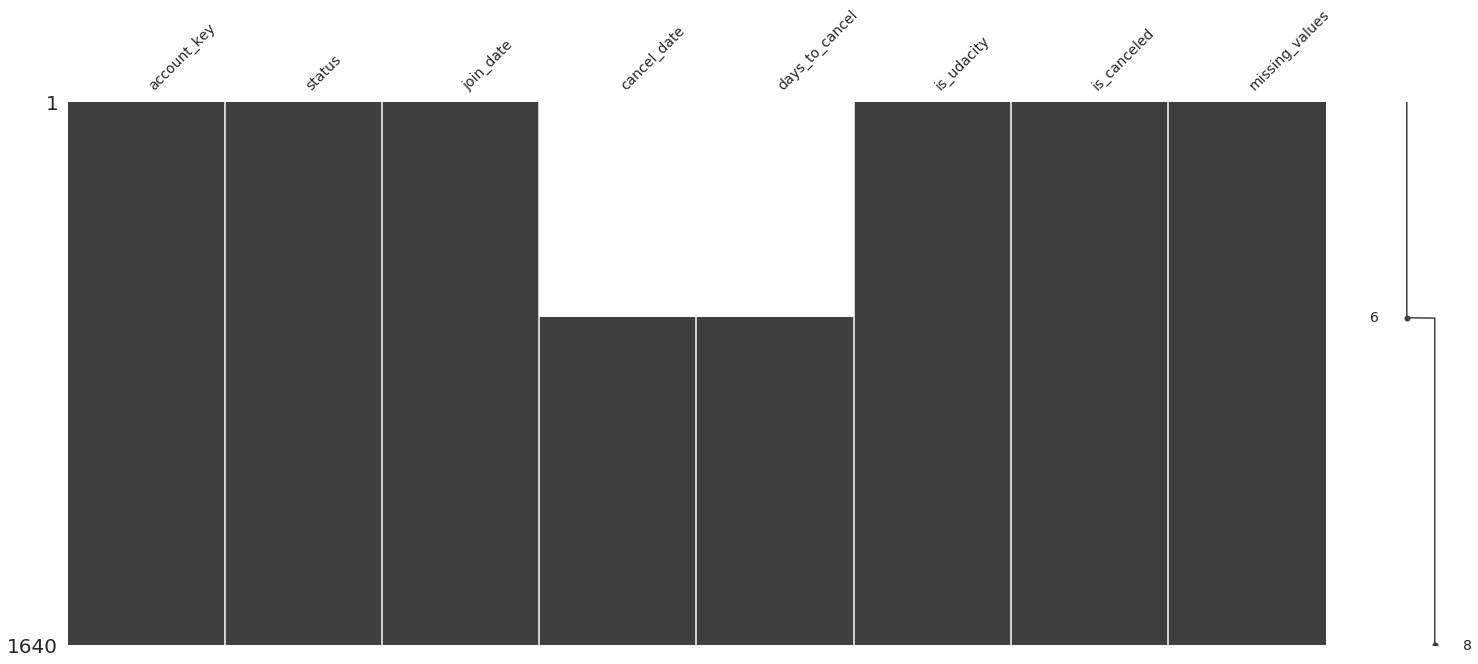

In [87]:
sorted_data = msno.nullity_sort(dataframe, sort='ascending')
msno.matrix(sorted_data,
            fontsize=14)

_Before observation missing values is necessary take decision if **remove** or **keep** missing values._

## Handler Missing Values

1. Dropping
2. Replacing by value out of distribuition
3. Apply mean or mode
4. Reconstruct values
5. Label

### Missing categorical data
- Apply **mode**
- Label values as `missing`
- Subistituir por algum valor fora do intervalo de distribuition

### Missing numeric data
- Apply **mean**
- The easy way `value = 0`.

### Note
- xgBoost working with missing values



### Dropping `dropna()`
- Remove rows : `dataframe.dropna()`
- Remove colluns: `dataframe.dropna(axis=1)`

#### Note
axis=0 : row
<br/>
axis=1 : column


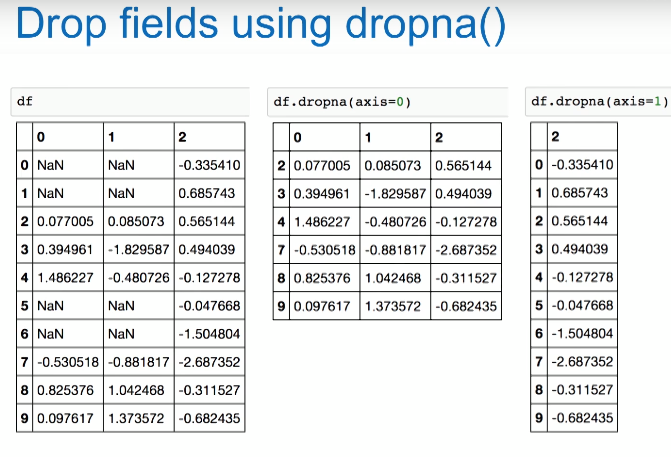

In [518]:
# hide_code
Image('references/images/dropna.png')

### Replacing by value out of distribuition `fillna()`

 - Eg: `-999`, `-1`, ...
 - **BAD**:  neural networks.

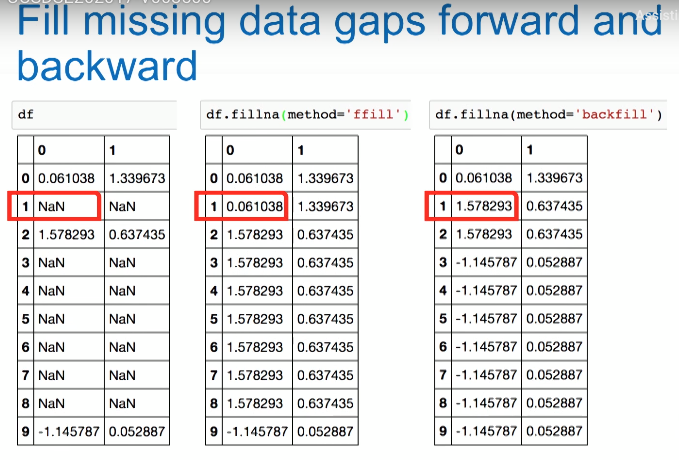

In [46]:
# hide_code
Image('reports/fillna.png')

### Apply mean or mode `fillna()`
 - **GOOD**: linear models and neural networks.
 - **BAD**:  para as tree, pode ser mais difícil selecionar o objeto que tinha missing values, logo de início.

In [ ]:
%%timeit

[df_callcenter.fillna(df_callcenter.mean(), inplace=True) for col in df_callcenter.columns]

### Reconstruct values

Substitua usando um algoritmo. o modelo de previsão é um dos métodos sofisticados para lidar com dados ausentes. Aqui, criamos um modelo preditivo para estimar valores que substituirão os dados ausentes. Nesse caso, dividimos nosso conjunto de dados em dois conjuntos: um conjunto sem valores ausentes para a variável e outro com valores ausentes. O primeiro conjunto de dados se torna o conjunto de dados de treinamento do modelo, enquanto o segundo conjunto de dados com valores omissos é o conjunto de dados de teste e a variável com valores omissos é tratada como variável de destino. 
  - KNN usando os vizinhos.
  - Regressão logística

### Label `fillna() `
 - **GOOD**: trees and neural networks
 - **BAD**: aumenta o número de colunas no dataset.


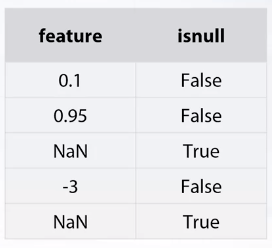

In [521]:
# hide_code
Image('references/images/label_missing_values.png', width=400, height=100)

### Linear Interpolation
 - Times series
 
#### NOTE
Adds less variance.

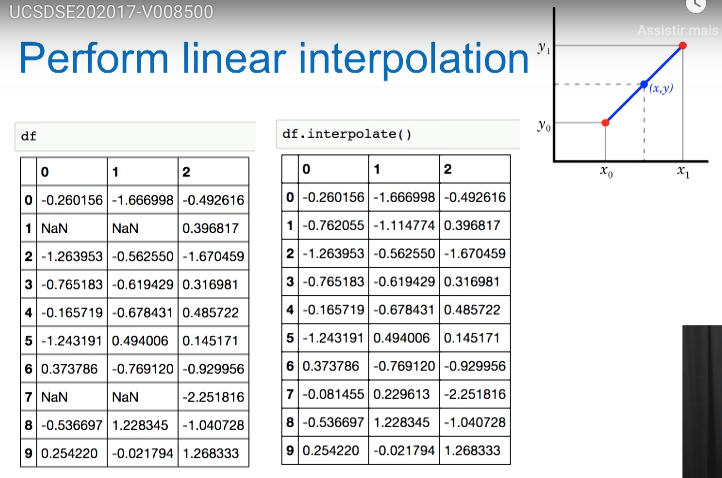

In [48]:
# hide_code
Image('reports/interpolation.png')

---

## Fixing Data Types

- conversao de dados
- É recomendado tratar os missing values primeiro

Quando não é necessário converter dados categoriacos p numericos?

In [487]:
deals.head()

,dealsId,dealsDateCreated,dealsPrice,contactsId,companiesId
0,9,2/28/2018,2630,57,57
1,10,9/8/2018,8880,11,29
2,18,4/5/2018,3930,30,30
3,23,6/13/2018,2300,32,32
4,24,1/1/2018,3480,15,19


In [488]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
dealsId             100 non-null int64
dealsDateCreated    100 non-null object
dealsPrice          100 non-null int64
contactsId          100 non-null int64
companiesId         100 non-null int64
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


#### `to_datetime()`

In [501]:
deals['dealsDateCreated'] = pd.to_datetime(deals['dealsDateCreated'], 
                                           yearfirst=False)
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
dealsId             100 non-null object
dealsDateCreated    100 non-null datetime64[ns]
dealsPrice          100 non-null int16
contactsId          100 non-null int64
companiesId         100 non-null int64
dtypes: datetime64[ns](1), int16(1), int64(2), object(1)
memory usage: 3.4+ KB


In [ ]:
#Transform string to date
data['date'] = pd.to_datetime(data.date, format="%d-%m-%Y")

#Extracting Year
data['year'] = data['date'].dt.year

#Extracting Month
data['month'] = data['date'].dt.month

#Extracting the weekday name of the date
data['day_name'] = data['date'].dt.day_name()

#### `to_numeric()` float

In [489]:
deals['dealsPrice'] = pd.to_numeric(deals['dealsPrice'], 
                                    errors='coerce', 
                                    downcast='float')
deals['dealsPrice'].head(10)

0   2630.0
1   8880.0
2   3930.0
3   2300.0
4   3480.0
5    330.0
6   1350.0
7   7660.0
8   2000.0
9   5930.0
Name: dealsPrice, dtype: float32

#### `to_numeric()` int
- Quando tem NaN, não é possível converter diretamente para integer
- Primiero tem que tratar os missing values

In [490]:
deals['dealsPrice'] = pd.to_numeric(deals['dealsPrice'], 
                                    errors='ignore', 
                                    downcast='integer')
deals['dealsPrice'].head(10)

0    2630
1    8880
2    3930
3    2300
4    3480
5     330
6    1350
7    7660
8    2000
9    5930
Name: dealsPrice, dtype: int16

#### `astype()` int

In [491]:
deals['dealsPrice'].astype(dtype='int32', 
                           errors='ignore')
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
dealsId             100 non-null int64
dealsDateCreated    100 non-null object
dealsPrice          100 non-null int16
contactsId          100 non-null int64
companiesId         100 non-null int64
dtypes: int16(1), int64(3), object(1)
memory usage: 3.4+ KB


###### int + NaN

In [492]:
# type(column) = object

df_callcenter['profissao'] = ( df_callcenter['profissao']\
                              .fillna(0)\
                              .astype(int)\
                              .astype(object)\
                              .where(df_callcenter['profissao'].notnull()))

ValueError: invalid literal for int() with base 10: 'dona_casa'

#### `astype()`To String
- Show collumn as `object`
- Problem: if contains NaN, the algortims not detect.

In [494]:
deals['dealsId'] = deals['dealsId'].astype(str) 
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
dealsId             100 non-null object
dealsDateCreated    100 non-null datetime64[ns]
dealsPrice          100 non-null int16
contactsId          100 non-null int64
companiesId         100 non-null int64
dtypes: datetime64[ns](1), int16(1), int64(2), object(1)
memory usage: 3.4+ KB


Meaning the method tries to fit the values.

In [97]:
def handler_typing(df: 'dataframe', type_col: str, list_cont_feature: list, *columns: list):
    for column in columns:
        if column in list_cont_feature:
            print(column)
            df[column] = df[column].map('{:,.2f}'.format) \
                        .astype(float) # object -> float
            continue
            
        df[column] = df[column].astype(dtype=type_col, errors='raise')
    
    return df.info(), display(df.head())

In [98]:
list_cont_feature = ['indice_precos_consumidor',
                     'indice_confianca_consumidor',
                     'euribor3m']

handler_typing(df_callcenter, 'int16', list_cont_feature, *list_columns)

ValueError: Cannot convert non-finite values (NA or inf) to integer

---

## Armazenamento dos Dados Limpos

In [371]:
def save_data_clenning(df: 'dataframe' = None,
                       path: str = 'data/cleansing/') -> None:
    df.to_csv(path_or_buf = path,
              sep = ',',
              index = False,
              encoding = 'utf8')
    
    return "Data recorded!"

In [372]:
save_data_clenning(df = df_callcenter,
                   path = 'data/cleansing/callcenter_marketing_cleanning.csv')

'Data recorded!'